In [5]:
import sys

import numpy as np
from utils import classifier as CLF

#####################
from utils import classifier as CLF
from utils import RASTER

from utils import checker
from utils import dataset as DS
from sklearn.preprocessing import LabelEncoder

In [8]:
dataset = 'ACSF1'
x_train , y_train , x_test, y_test = DS.load_dataset(dataset,verbose=True)
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
y_test = enc.transform(y_test)

n_features = 10000
sizes = x_train.shape[1]//200 + 1
# print('sizes:', sizes)
### MiniROCKET #####
x_train_trans_mini , x_test_trans_mini ,parameter_mini= RASTER.MiniROCKET(x_train,y_train, x_test,y_test,n_features=n_features,shuffle_quant=False)
accuracy , (x_train_mini_scl,x_test_mini_scl), clf_mini  = CLF.classic_classifier(x_train_trans_mini, y_train, x_test_trans_mini, y_test)
print("MiniROCKET accuracy:", accuracy)


x_train_trans_raster , x_test_trans_raster ,parameter_raster = RASTER.RASTER(x_train,y_train, x_test,y_test,n_features=n_features,sizes=sizes, shuffle_quant = False)
accuracy , (x_train_raster_scl,x_test_raster_scl), clf_raster  = CLF.classic_classifier(x_train_trans_raster, y_train, x_test_trans_raster, y_test)
print("RASTER accuracy:", accuracy)


ACSF1 : 	(100, 1460) (100, 1460)
#labels:  [0 1 2 3 4 5 6 7 8 9]
MiniROCKET accuracy: 0.91
RASTER accuracy: 0.87


Should we use TER? True


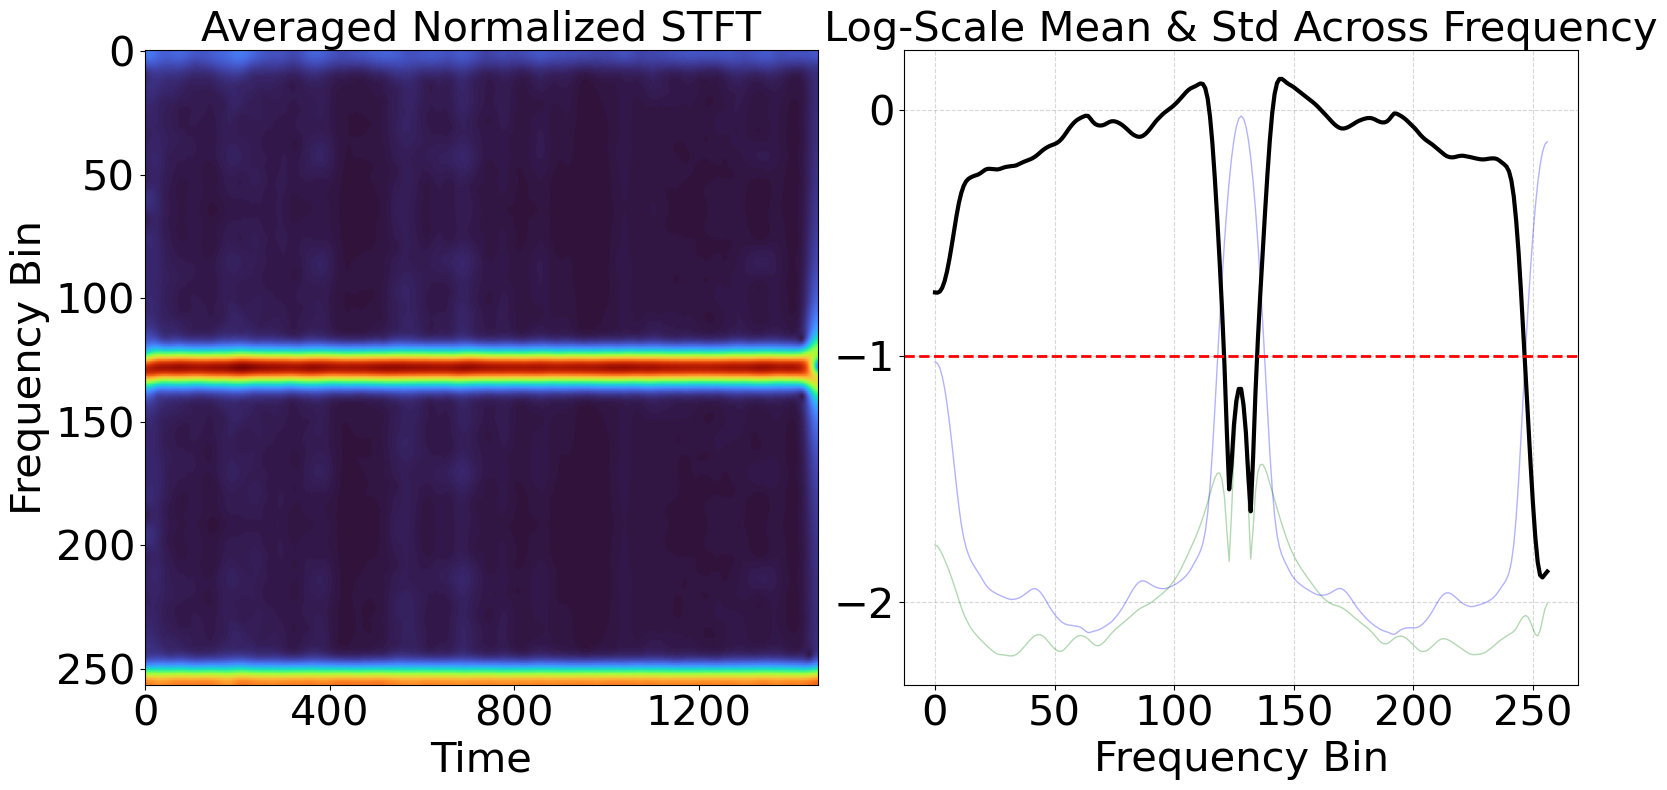

In [10]:

avg_spec = checker.average_spectogram(x_train,verbose=False)
should_use_TER = checker.is_evenly_distributed(avg_spec,verbose=True,Dataset=dataset)
print('Should we use TER?',should_use_TER)